# Notebook used for Final report on Analysis of Bristol housing

In [18]:
#Import some stuff

import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [13]:
#Get data from WiKi
URL ='https://en.wikipedia.org/wiki/BS_postcode_area'
d = pd.read_html(URL)
df = d[1]

df = df[df["Local authority area"] != 'non-geographic[3][4]']


In [14]:
df.shape

(39, 4)

In [15]:
df.dropna(inplace=True)
df.head(100)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Postcode district,Post town,Coverage,Local authority area
1,BS1,BRISTOL,"Bristol city centre, Redcliffe",Bristol
2,BS2,BRISTOL,"Kingsdown, St Paul's, St Phillip's, St Agnes",Bristol
3,BS3,BRISTOL,"Bedminster, Southville, Bower Ashton, part of ...",Bristol
4,BS4,BRISTOL,"Brislington, Knowle, Knowle West, St Anne's, p...",Bristol
5,BS5,BRISTOL,"Easton, St George, Redfield, Whitehall, Eastvi...",Bristol
6,BS6,BRISTOL,"Cotham, Redland, Montpelier, Westbury Park, St...",Bristol
7,BS7,BRISTOL,"Bishopston, Horfield, part of Filton, Lockleaz...","Bristol, South Gloucestershire"
8,BS8,BRISTOL,"Clifton, Failand, Hotwells, Leigh Woods","Bristol, North Somerset"
9,BS9,BRISTOL,"Coombe Dingle, Sneyd Park, Stoke Bishop, Westb...",Bristol
10,BS10,BRISTOL,"Brentry, Henbury, Southmead, part of Westbury ...",Bristol


In [16]:
df.dtypes

Postcode district       object
Post town               object
Coverage                object
Local authority area    object
dtype: object

Text(0.5, 1.0, 'Graph to show number of unique values in column')

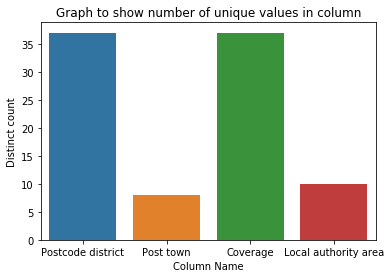

In [24]:
column_list = []
value_list = []

for col in df.columns:
    column_list.append(col)
    value_list.append(df[col].nunique())

ax = sns.barplot(x=column_list, y=value_list)
ax.set(xlabel='Column Name', ylabel='Distinct count')
plt.title("Graph to show number of unique values in column")


In [25]:
#Only keep bristol post town
df = df[df["Post town"] == 'BRISTOL']
df.head(1000)

,Postcode district,Post town,Coverage,Local authority area
1,BS1,BRISTOL,"Bristol city centre, Redcliffe",Bristol
2,BS2,BRISTOL,"Kingsdown, St Paul's, St Phillip's, St Agnes",Bristol
3,BS3,BRISTOL,"Bedminster, Southville, Bower Ashton, part of ...",Bristol
4,BS4,BRISTOL,"Brislington, Knowle, Knowle West, St Anne's, p...",Bristol
5,BS5,BRISTOL,"Easton, St George, Redfield, Whitehall, Eastvi...",Bristol
6,BS6,BRISTOL,"Cotham, Redland, Montpelier, Westbury Park, St...",Bristol
7,BS7,BRISTOL,"Bishopston, Horfield, part of Filton, Lockleaz...","Bristol, South Gloucestershire"
8,BS8,BRISTOL,"Clifton, Failand, Hotwells, Leigh Woods","Bristol, North Somerset"
9,BS9,BRISTOL,"Coombe Dingle, Sneyd Park, Stoke Bishop, Westb...",Bristol
10,BS10,BRISTOL,"Brentry, Henbury, Southmead, part of Westbury ...",Bristol


In [26]:
df.shape

(28, 4)

# Add geo location

In [41]:
coord = pd.read_csv('coordinates.csv')
coord.head()

,postcode,latitude,longitude
0,BS1,51.455360,-2.59153
1,BS2,51.453880,-2.58632
2,BS3,51.444580,-2.60078
3,BS4,51.434898,-2.56712
4,BS5,51.473549,-2.54909


In [42]:
final_df = pd.merge(df,coord,on=[df['Postcode district'], coord["postcode"]])
final_df.drop(['key_0','key_1','Postcode district'],axis=1,inplace=True)

In [39]:
final_df.head()

,Post town,Coverage,Local authority area,postcode,latitude,longitude
0,BRISTOL,"Bristol city centre, Redcliffe",Bristol,BS1,51.455360,-2.59153
1,BRISTOL,"Kingsdown, St Paul's, St Phillip's, St Agnes",Bristol,BS2,51.453880,-2.58632
2,BRISTOL,"Bedminster, Southville, Bower Ashton, part of ...",Bristol,BS3,51.444580,-2.60078
3,BRISTOL,"Brislington, Knowle, Knowle West, St Anne's, p...",Bristol,BS4,51.434898,-2.56712
4,BRISTOL,"Easton, St George, Redfield, Whitehall, Eastvi...",Bristol,BS5,51.473549,-2.54909


In [165]:
# create map of Toronto using latitude and longitude values
import folium
map_test = folium.Map(location=["51.4545", "-2.5879"])

# add markers to map
for lat, lng, borough, neighborhood in zip(final_df['latitude'], final_df['longitude'], final_df['Coverage'], final_df['Local authority area']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_test)  
    
map_test

### Add fourSquared creds

In [44]:
CLIENT_ID = 'NR0R1IZ4DS1Y3U5QMZN2EHIWQNNR1XA4453ZRBIFDLEQF0NS' # your Foursquare ID
CLIENT_SECRET = 'AT2GTM11V15V2NBTXJAY1BUPE0M0Y1UD4E0UGF5KHFXTK1M4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NR0R1IZ4DS1Y3U5QMZN2EHIWQNNR1XA4453ZRBIFDLEQF0NS
CLIENT_SECRET:AT2GTM11V15V2NBTXJAY1BUPE0M0Y1UD4E0UGF5KHFXTK1M4


In [46]:
#Explore first n
print("First area is: {}".format(final_df.loc[0,'Coverage']))

First area is: Bristol city centre, Redcliffe


### Use fourSquared to get venue info for each post code

In [47]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
    


In [51]:
bristol_venues = getNearbyVenues(names=final_df['Coverage'],
                                   latitudes=final_df['latitude'],
                                   longitudes=final_df['longitude']
                                  )

Bristol city centre, Redcliffe
Kingsdown, St Paul's, St Phillip's, St Agnes
Bedminster, Southville, Bower Ashton, part of Totterdown, Windmill Hill
Brislington, Knowle, Knowle West, St Anne's, part of Totterdown
Easton, St George, Redfield, Whitehall, Eastville, Speedwell, Greenbank, Barton Hill
Cotham, Redland, Montpelier, Westbury Park, St. Andrew's
Bishopston, Horfield, part of Filton, Lockleaze, Ashley Down,
Clifton, Failand, Hotwells, Leigh Woods
Coombe Dingle, Sneyd Park, Stoke Bishop, Westbury on Trym, Henleaze, Bristol
Brentry, Henbury, Southmead, part of Westbury on Trym,
Avonmouth, Shirehampton, Lawrence Weston
Bedminster Down, Bishopsworth, Hartcliffe, Withywood, Headley Park
Hengrove, Stockwood, Whitchurch, Withywood
Hanham, Kingswood
Downend, Emersons Green, Fishponds, Frenchay, Pucklechurch, Staple Hill
Portishead
Bitton, Longwell Green, Cadbury Heath, Oldland Common, Warmley, Wick
Chewton Keynsham, Keynsham, Saltford
Almondsbury, Bradley Stoke
Part of Filton, Little Stok

# Analyze coverage areas

Text(0.5, 1.0, 'Graph to show the number of unique venues at each location around Bristol')

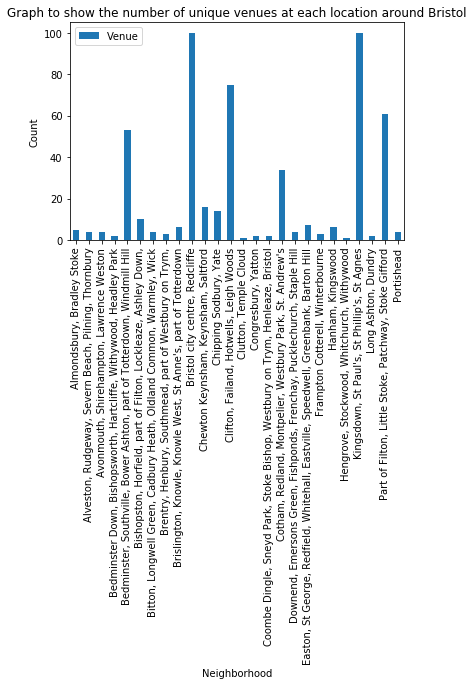

In [169]:
plotss = bristol_venues.groupby('Neighborhood').count()
ax = plotss[['Venue']].plot(kind='bar')
ax.set(xlabel='Neighborhood', ylabel='Count')
plt.title("Graph to show the number of unique venues at each location around Bristol")

Text(0.5, 1.0, "Graph to show the number of unique 'Type' of venue at each location")

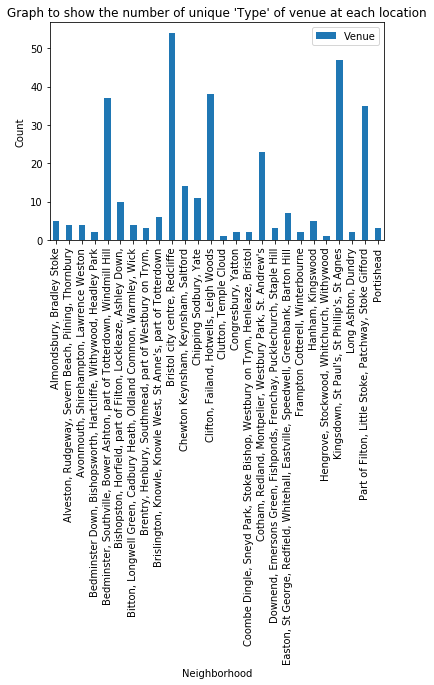

In [170]:
plot2 = bristol_venues.groupby(['Neighborhood','Venue Category'], as_index=False).count()
plot3 = plot2.groupby('Neighborhood').count()
ax = plot3[['Venue']].plot(kind='bar')
ax.set(xlabel='Neighborhood', ylabel='Count')
plt.title("Graph to show the number of unique 'Type' of venue at each location")

## It looks like Bristol city centre and stoke gifford/Filton are the best places to live if you are looking for lots of things to do near by

In [98]:
# one hot encoding
onehot = pd.get_dummies(bristol_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = bristol_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Neighborhood,Accessories Store,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bakery,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store
0,"Bristol city centre, Redcliffe",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Bristol city centre, Redcliffe",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Bristol city centre, Redcliffe",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Bristol city centre, Redcliffe",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bristol city centre, Redcliffe",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
bristol_grouped = onehot.groupby('Neighborhood').mean().reset_index()
bristol_grouped

,Neighborhood,Accessories Store,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bakery,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store
0,"Almondsbury, Bradley Stoke",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
1,"Alveston, Rudgeway, Severn Beach, Pilning, Tho...",0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
2,"Avonmouth, Shirehampton, Lawrence Weston",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
3,"Bedminster Down, Bishopsworth, Hartcliffe, Wit...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
4,"Bedminster, Southville, Bower Ashton, part of ...",0.000000,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,0.037736,0.000000,...,0.00,0.000000,0.018868,0.000000,0.00,0.018868,0.018868,0.000000,0.000000,0.00000
5,"Bishopston, Horfield, part of Filton, Lockleaz...",0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
6,"Bitton, Longwell Green, Cadbury Heath, Oldland...",0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.25,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
7,"Brentry, Henbury, Southmead, part of Westbury ...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
8,"Brislington, Knowle, Knowle West, St Anne's, p...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000
9,"Bristol city centre, Redcliffe",0.000000,0.010000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.00000


### What is the 5 most popular venue per neighborhood in Bristol

In [101]:
num_top_venues = 5

for hood in bristol_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bristol_grouped[bristol_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Almondsbury, Bradley Stoke----
                        venue  freq
0                  Food Truck   0.2
1  Construction & Landscaping   0.2
2               Garden Center   0.2
3                 Golf Course   0.2
4                        Lake   0.2


----Alveston, Rudgeway, Severn Beach, Pilning, Thornbury----
                  venue  freq
0     Mobile Phone Shop  0.25
1      Asian Restaurant  0.25
2  Fast Food Restaurant  0.25
3                   Pub  0.25
4                  Pool  0.00


----Avonmouth, Shirehampton, Lawrence Weston----
                venue  freq
0                 Pub  0.25
1       Historic Site  0.25
2           Gun Range  0.25
3   Convenience Store  0.25
4  Italian Restaurant  0.00


----Bedminster Down, Bishopsworth, Hartcliffe, Withywood, Headley Park----
                   venue  freq
0            Supermarket   0.5
1               Pharmacy   0.5
2                    Pub   0.0
3  Portuguese Restaurant   0.0
4                   Pool   0.0


----Bedminster, Southv

In [147]:
### Convert to dataframe

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bristol_grouped['Neighborhood']

for ind in np.arange(bristol_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bristol_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Almondsbury, Bradley Stoke",Construction & Landscaping,Food Truck,Lake,Golf Course,Garden Center,Women's Store,Discount Store,Falafel Restaurant,English Restaurant,Electronics Store
1,"Alveston, Rudgeway, Severn Beach, Pilning, Tho...",Fast Food Restaurant,Pub,Mobile Phone Shop,Asian Restaurant,Diner,Falafel Restaurant,English Restaurant,Electronics Store,Discount Store,Women's Store
2,"Avonmouth, Shirehampton, Lawrence Weston",Historic Site,Pub,Gun Range,Convenience Store,Dessert Shop,Falafel Restaurant,English Restaurant,Electronics Store,Discount Store,Diner
3,"Bedminster Down, Bishopsworth, Hartcliffe, Wit...",Pharmacy,Supermarket,Women's Store,Fish & Chips Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop
4,"Bedminster, Southville, Bower Ashton, part of ...",Coffee Shop,Pizza Place,Pub,Bar,Fast Food Restaurant,Pharmacy,Harbor / Marina,Café,Restaurant,BBQ Joint


### Cluster similar neighbourhoods in Bristol

In [148]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 7

grouped_clustering = bristol_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bristol_merged = final_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bristol_merged = bristol_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Coverage')

bristol_merged.head() # check the last columns!

,Post town,Coverage,Local authority area,postcode,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BRISTOL,"Bristol city centre, Redcliffe",Bristol,BS1,51.455360,-2.59153,1.0,Pub,Bar,Coffee Shop,Café,Italian Restaurant,Clothing Store,Burger Joint,Sandwich Place,Indian Restaurant,Hotel
1,BRISTOL,"Kingsdown, St Paul's, St Phillip's, St Agnes",Bristol,BS2,51.453880,-2.58632,1.0,Pub,Café,Coffee Shop,Sandwich Place,Italian Restaurant,Hotel,Grocery Store,Burger Joint,Bookstore,Clothing Store
2,BRISTOL,"Bedminster, Southville, Bower Ashton, part of ...",Bristol,BS3,51.444580,-2.60078,1.0,Coffee Shop,Pizza Place,Pub,Bar,Fast Food Restaurant,Pharmacy,Harbor / Marina,Café,Restaurant,BBQ Joint
3,BRISTOL,"Brislington, Knowle, Knowle West, St Anne's, p...",Bristol,BS4,51.434898,-2.56712,1.0,Café,Park,Casino,Sandwich Place,Shopping Mall,Gastropub,Women's Store,Electronics Store,Discount Store,Diner
4,BRISTOL,"Easton, St George, Redfield, Whitehall, Eastvi...",Bristol,BS5,51.473549,-2.54909,1.0,Pub,Bus Stop,Athletics & Sports,Auto Garage,Park,Indian Restaurant,Optical Shop,Women's Store,Diner,English Restaurant


In [150]:
bristol_merged.dropna(inplace=True)
bristol_merged['Cluster Labels'] = bristol_merged['Cluster Labels'].astype(int)

In [151]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=["51.4545", "-2.5879"], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bristol_merged['latitude'], bristol_merged['longitude'], bristol_merged['Coverage'], bristol_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Look at the different clusters to see what area of bristol someone may be best suited to

## Cluster 1

In [154]:
bristol_merged.loc[bristol_merged['Cluster Labels'] == 0, bristol_merged.columns[[1] + list(range(5, bristol_merged.shape[1]))]]

,Coverage,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,"Brentry, Henbury, Southmead, part of Westbury ...",-2.597105,0,Golf Course,Clothing Store,Soccer Field,Dessert Shop,Falafel Restaurant,English Restaurant,Electronics Store,Discount Store,Diner,Women's Store


### Cluster 2

In [155]:
bristol_merged.loc[bristol_merged['Cluster Labels'] == 1, bristol_merged.columns[[1] + list(range(5, bristol_merged.shape[1]))]]

,Coverage,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bristol city centre, Redcliffe",-2.591530,1,Pub,Bar,Coffee Shop,Café,Italian Restaurant,Clothing Store,Burger Joint,Sandwich Place,Indian Restaurant,Hotel
1,"Kingsdown, St Paul's, St Phillip's, St Agnes",-2.586320,1,Pub,Café,Coffee Shop,Sandwich Place,Italian Restaurant,Hotel,Grocery Store,Burger Joint,Bookstore,Clothing Store
2,"Bedminster, Southville, Bower Ashton, part of ...",-2.600780,1,Coffee Shop,Pizza Place,Pub,Bar,Fast Food Restaurant,Pharmacy,Harbor / Marina,Café,Restaurant,BBQ Joint
3,"Brislington, Knowle, Knowle West, St Anne's, p...",-2.567120,1,Café,Park,Casino,Sandwich Place,Shopping Mall,Gastropub,Women's Store,Electronics Store,Discount Store,Diner
4,"Easton, St George, Redfield, Whitehall, Eastvi...",-2.549090,1,Pub,Bus Stop,Athletics & Sports,Auto Garage,Park,Indian Restaurant,Optical Shop,Women's Store,Diner,English Restaurant
5,"Cotham, Redland, Montpelier, Westbury Park, St...",-2.606200,1,Café,Pub,Restaurant,Coffee Shop,Pizza Place,Italian Restaurant,Indian Restaurant,Sandwich Place,Burger Joint,Shopping Mall
6,"Bishopston, Horfield, part of Filton, Lockleaz...",-2.584188,1,Sports Bar,Bakery,Coffee Shop,Pub,Bus Stop,Soccer Stadium,Sporting Goods Shop,Gastropub,Pizza Place,Auto Garage
7,"Clifton, Failand, Hotwells, Leigh Woods",-2.613440,1,Café,Pub,Bar,Hotel,Indian Restaurant,Italian Restaurant,Coffee Shop,Pizza Place,Park,Thai Restaurant
10,"Avonmouth, Shirehampton, Lawrence Weston",-2.677230,1,Historic Site,Pub,Gun Range,Convenience Store,Dessert Shop,Falafel Restaurant,English Restaurant,Electronics Store,Discount Store,Diner
13,"Hanham, Kingswood",-2.524240,1,Grocery Store,Pub,Convenience Store,Indian Restaurant,Auto Workshop,Women's Store,Diner,Falafel Restaurant,English Restaurant,Electronics Store


### Cluster 3

In [156]:
bristol_merged.loc[bristol_merged['Cluster Labels'] == 2, bristol_merged.columns[[1] + list(range(5, bristol_merged.shape[1]))]]

,Coverage,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Coombe Dingle, Sneyd Park, Stoke Bishop, Westb...",-2.62617,2,Park,Botanical Garden,Women's Store,Food,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner


### Cluster 4

In [157]:
bristol_merged.loc[bristol_merged['Cluster Labels'] == 3, bristol_merged.columns[[1] + list(range(5, bristol_merged.shape[1]))]]

,Coverage,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"Hengrove, Stockwood, Whitchurch, Withywood",-2.55845,3,English Restaurant,Women's Store,Food,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner


### Cluster 5

In [159]:
bristol_merged.loc[bristol_merged['Cluster Labels'] == 4, bristol_merged.columns[[1] + list(range(5, bristol_merged.shape[1]))]]

,Coverage,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Portishead,-2.67982,4,Pub,Hill,Park,Fast Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store
21,"Frampton Cotterell, Winterbourne",-2.49648,4,Pub,Gastropub,Fish & Chips Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop
25,"Long Ashton, Dundry",-2.64698,4,Pub,Bed & Breakfast,Women's Store,Diner,Fast Food Restaurant,Falafel Restaurant,English Restaurant,Electronics Store,Discount Store,Dessert Shop
27,"Congresbury, Yatton",-2.84028,4,Pub,Hotel,Fish & Chips Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop


### Cluster 6

In [161]:
bristol_merged.loc[bristol_merged['Cluster Labels'] == 5, bristol_merged.columns[[1] + list(range(5, bristol_merged.shape[1]))]]

,Coverage,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,"Clutton, Temple Cloud",-2.55017,5,Gastropub,Women's Store,Food,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner


### Cluster 7

In [163]:
bristol_merged.loc[bristol_merged['Cluster Labels'] == 6, bristol_merged.columns[[1] + list(range(5, bristol_merged.shape[1]))]]

,Coverage,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"Bedminster Down, Bishopsworth, Hartcliffe, Wit...",-2.59993,6,Pharmacy,Supermarket,Women's Store,Fish & Chips Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop
